# Работа с путями, директориями и файлами

Файлы и методы Python для работы с ними. Для того, чтобы разобраться в данной теме, необходимо понять, что такое файл и как этот файл должен оказаться в коде. Начнем с того, что такое файл? Если очень просто - это какой-то объект который присутсвует на компьютере или сервере, он может быть текстовым файлом ( к примеру, таблица в формате txt, cvs, tsv, exel), может быть какой-то файл с кодом (к примеру, на языке Python или любом другом, т.е. программа), может быть бинарный файл или какое-либо изображение(рисунок, фотография, график, диаграмма, граф). Но самое главное при работе с файлом, необходимо понимать 3 важных момента:  
1) Что это за файл? Т.е. какого типа данные  
2) Где находится этот файл  
3) Что необходимо делать с файлом? Записать в него что-то или наоборот, прочитать

## Пути и куда они ведут
С пунктом 1 немного разобрались. В рамках данного занятия будет работа с текстовыми файлами, в формате txt, а также с текстовым форматом хранения нуклеотидных и аминокислотных последовательностей - fasta. Также в разделе по работе с pandas будет показана работа с изображениями.
Перейдем теперь к тому, где находится данный файл? Где-то на компьютере или на сервере например. И чтобы его найти, надо преодолеть определенный путь, потыкать по папкам и найти его. Поэтому место, где хранится интересующий файл и называется путь до файла. Т.е. по сути, путь, это последовательное расположение директорий(папок) которые нужно пройти, чтобы попасть к директории где лежит необходимый файл. Путь до файла может быть 2 видов:  
1) **Абсолютный путь**  
2) **Относительный путь**

Абсолютный путь - это когда путь прописывается к файлу прямо корневого диска. Относительный путь - это путь, который указывается к файлу относительно места запуска кода, к примеру, когда в директории где код, у вас отдельная папка для файлов. Вне зависимости от того, абсолютный или относительный это путь, он состоит из названия дирректорий и разделителей, в Windows это обратный слеш - \\, а в Linux и Mac - обычный /. Если путь относительный, то в начале всегда необходимо прописать диск, на котором располагается файл  и затем через :\\ или :/ начать прописывать уже сам путь. Важный момент - в Windows разделитель это \\, но в Python - \\ - это специальный символ экранирования, поэтому чтобы не возникало проблем необходимо экранировать символ экранирования, т.е. по сути необходимо прописать два обратных слеша, вместо одного - \\\\.  

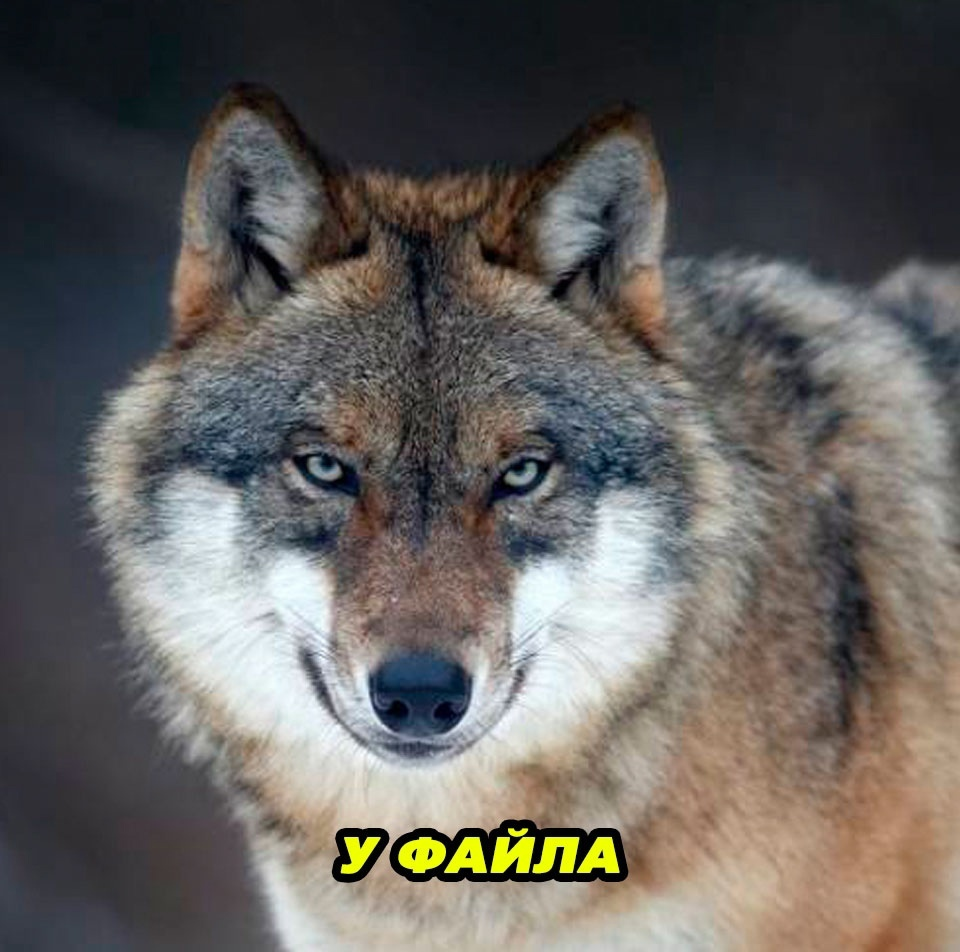

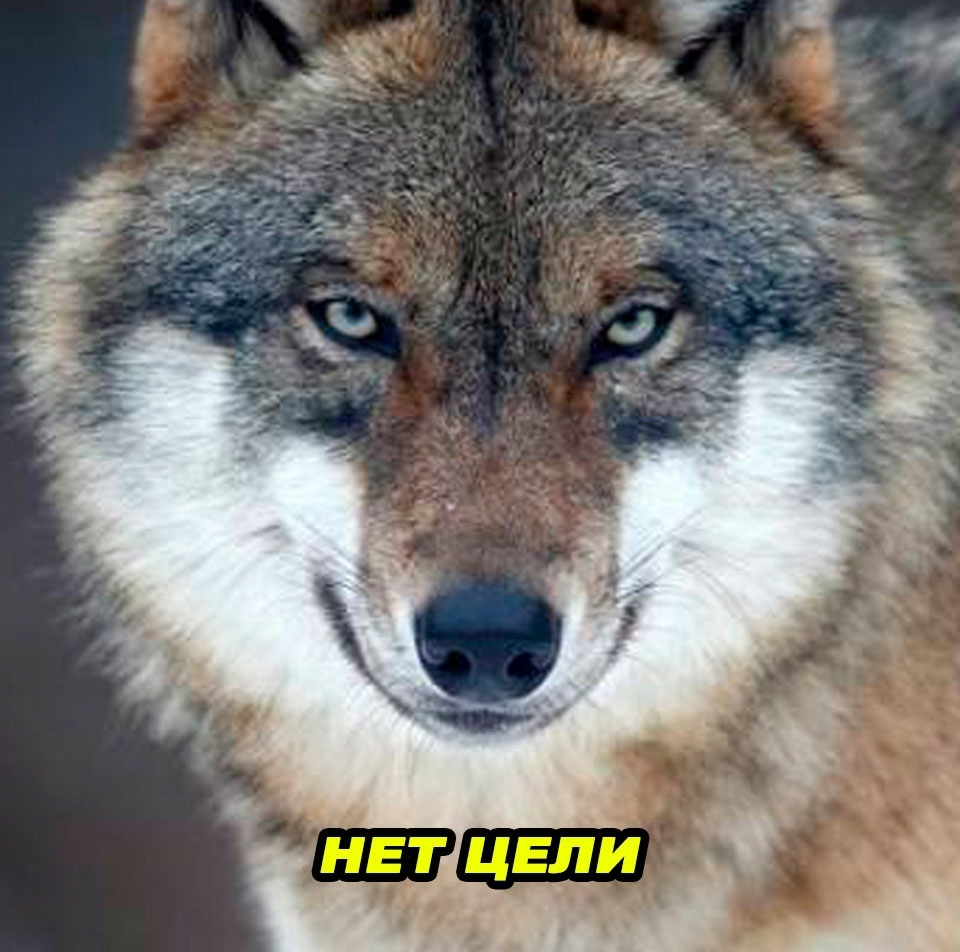

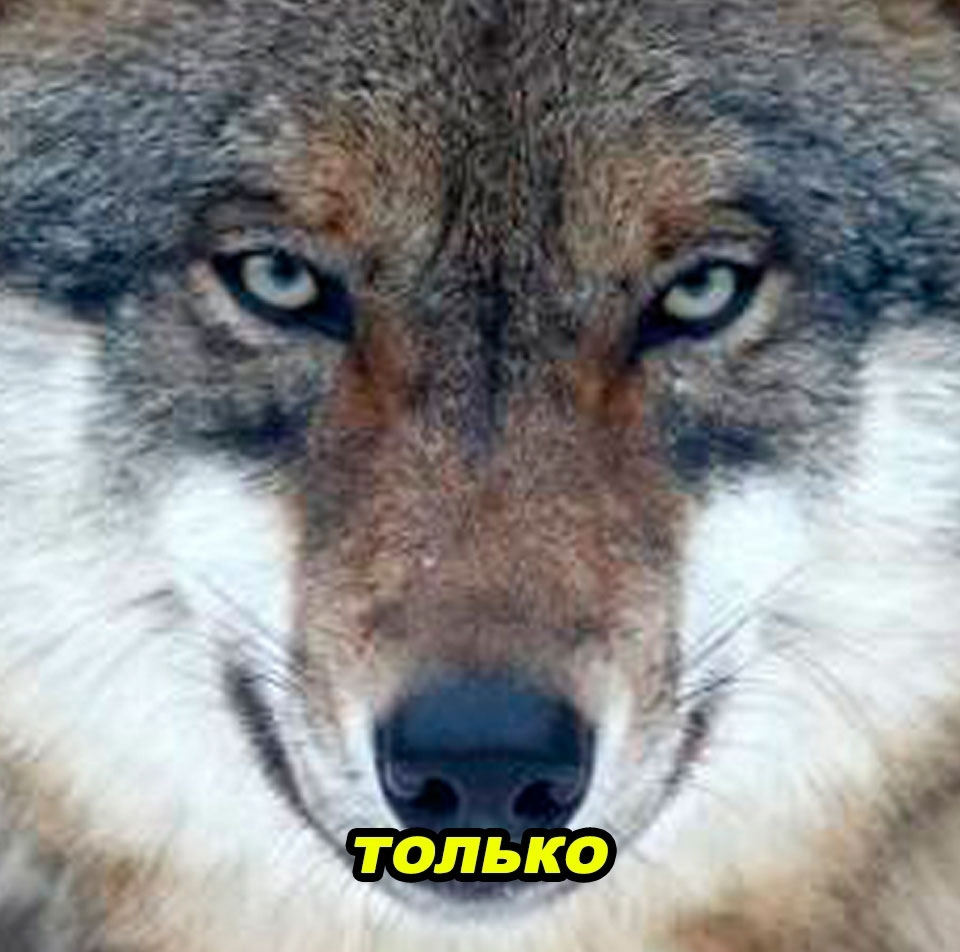

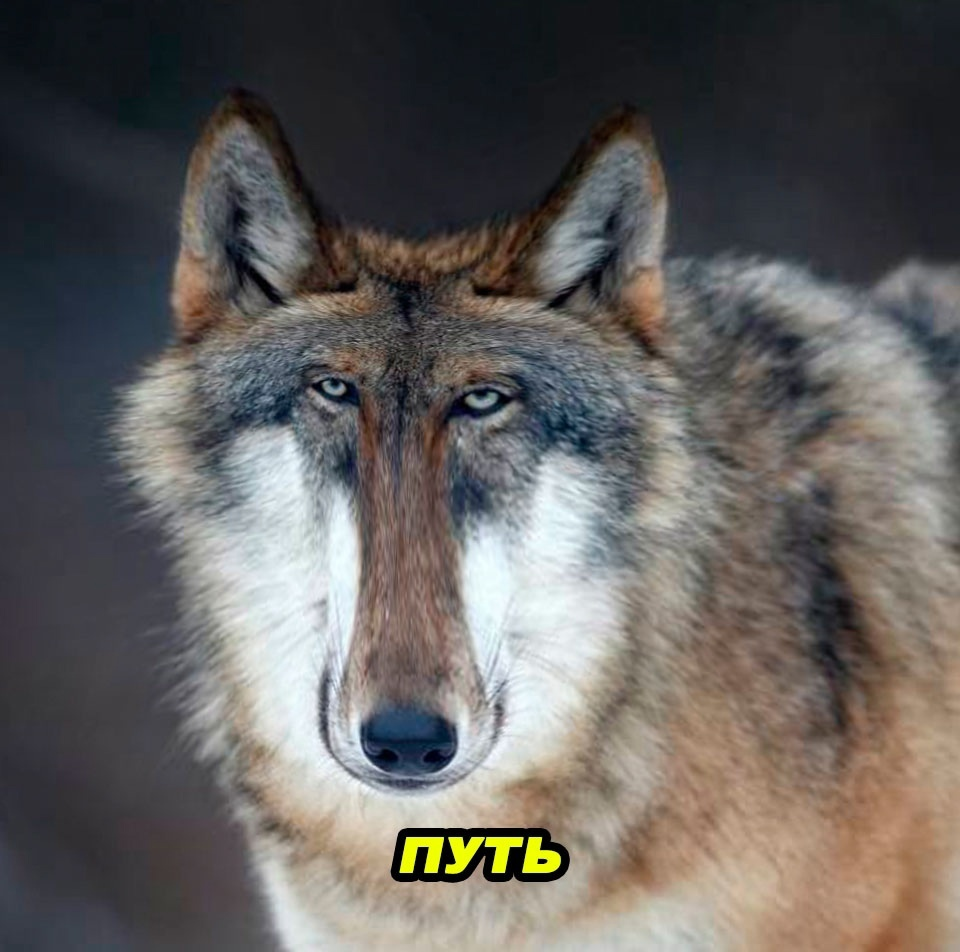

Поняв, что такое путь, надо понять, а как его получить? Просто посмотреть где лежит файл и прописать путь руками один из наиболее простых вариантов. Для этого просто нужно создать строку и прописать в ней путь, ничего больше не потребуется. Рассмотрим на примере как прописать путь до текстового файла. Допустим, наш код лежит в папке derectory. А интересующий файл лежит в папке data, которая находится глубже в папке derectory.


In [4]:
# Пример переменной с абсолютным путем
absolute_path = 'С:\\path\\to\\derectory\\tables\\with\\data\\file.txt'

# Пример переменной с относительным путем
relative_path = 'derectory\\tables\\with\\data\\file.txt'

Безусловно, в данном случае выгоднее использовать относительный путь, а абсолтный путь стоит указывать, если файл лежит, к примеру, на другом диске и в папке вообще не связанной с кодом. Но в данных примерах рассмотренны случаи только случаи, когда файл лежит в папках глубже, чем сам код. А что делать, если код лежит, к примеру, в той же папке? Или в папке, которая находится перед папкой в которой лежит код? Для этого существует ряд операторов, которые читаются системой как шаг обртно и текущая папка. К примеру, для того, чтобы попасть в предыдщую папку от кода достаточно пропсто прописть две точки: ../  а для указания текущей директории, в которой, к примеру, находится код: ./ Хотя в случае с Python, ему достаточно указать просто название файла и если такой файл есть в директории из которой запускается код - то он его сам найдет. В коде это будет выглядеть следующим образом

In [3]:
# Пример переменной с путем до файла в предшествующей директории
return_path = '..\\file.txt'

# Пример переменной с путем до файла в текущей директории c использованием названия файла
curent_path = 'file.txt'

После этого сразу возникает логичный вопрос - а что, нужно каждый раз прописывать руками вот так вот путь? Ставить постоянно двойные слеши? А если 100 файлов, надо прописать 100 путей или хотя бы 100 названий файлов, если они находятся в папке с кодом? К счастью, программисты очень ленивые и существует решение всех данных вопросов с помощью кода. Самая популярная библиотека для этого - os. Также есть еще библиотека pathlib, которая упрощает многие функции os, но про нее тут расказываться не будет. Главное понять принцип работы, а чем пользоваться - это уже личное дело каждого. Библиотека os это библиотека которая стандартно идет с Python. Это бибилиотека не направлена на работу с путями, она в целом направлена на работу с операционной системой прямо не выходя из кода. Ее арсенал настолько огромен, что для полного ее разбора потребуется не одна лекция. Данная бибилиотека даже дает возможность прописывать код в консоль на linux запуская код в Python, дает возможность распределять потоки для рассчета и еще очень много всего. Так что сегодня мы ограничимся лишь частью ее базовых методов, а также методом path и его собственными методами. Начнем с самого простого. Как определить абсолютный путь текущей директори, в которой находится код? Опять бежать в консоль, либо в проводник и смотреть его там? нет,для этого уже придумали метод getcwd()

In [1]:
# Получение абсолютного пути до исполняемого кода в Python с помощью os.getcwd
import os
cur_d = os.getcwd()
cur_d

'C:\\Users\\Mikhail\\Documents\\GitHub\\python-for-beginners'

Также стоит отметить, что у бибилиотеки os есть встроенные методы os.curdir и os.pardir, которые по своей сути ничего не показывают, в них просто записаны символ . и .. чтобы при обращении к ним можно было попасть в текущую или в предшествующую дирректорию

In [17]:
# os.curdir
os.curdir

'.'

In [18]:
# os.pardir
os.pardir

'..'

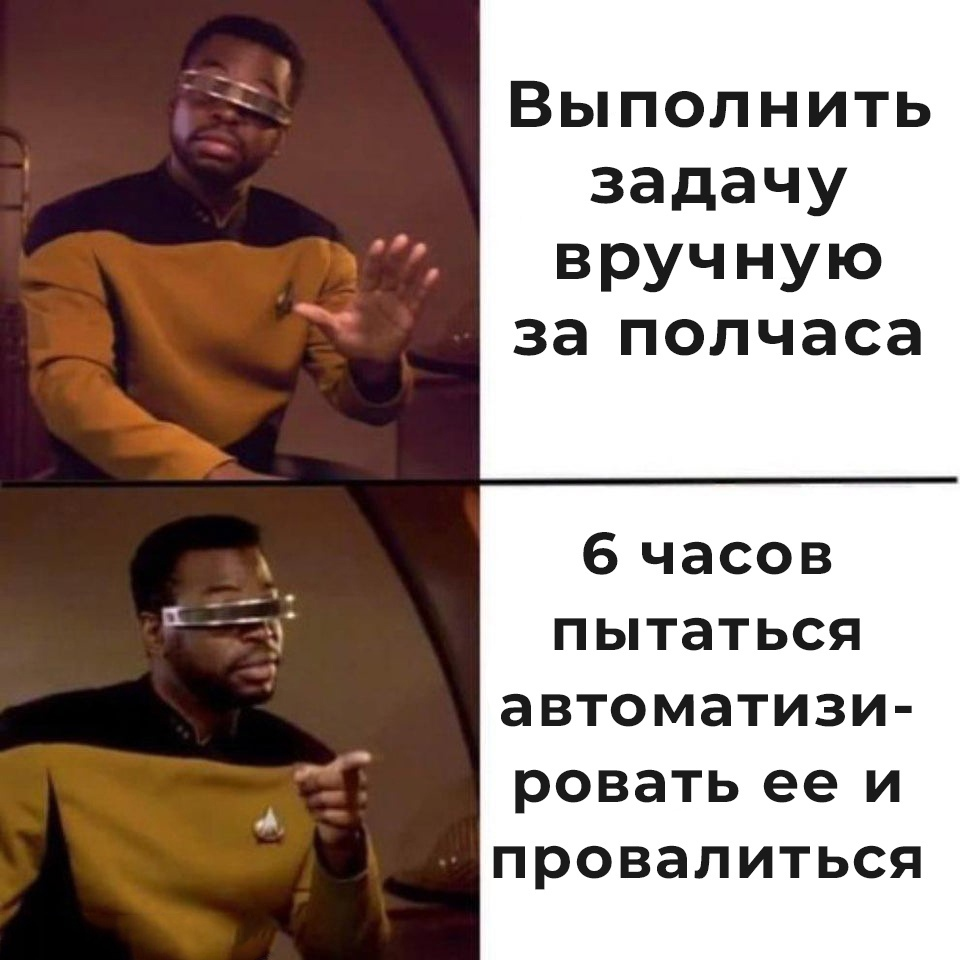

Теперь рассмотрим метод os.chdir - метод который позволяет переместиться в другую дирректорию, прям внутри кода. Это значит, что если, к примеру, файлы и код находятся в разных местах, необязательно искать пути или перемещать файлы - можно просто перейти туда внутри кода и работать в интересующей папке. Попробуем объеденить метод os.pardir уходящий в предшествующую папку и метод os.chdir

In [19]:
# Применение os.chdir вместе с os.pardir
os.chdir(os.pardir)
os.getcwd()

'C:\\Users\\Mikhail\\Documents\\GitHub'

Обратите внимание, что os.getcwd() теперь показывает не папку в которой лежит код, а папку, в которую мы переместились с помощью os.chdir. Чтобы переместиться также можно указывать путь с помощью строки. Попробуем переместиться еще на 2 папки назад с помощью использования 2 операторов ../../

In [22]:
# Использование строки для передачи пути в os.chdir 
os.chdir('../../')
os.getcwd()

'C:\\Users\\Mikhail'

Классно! А как теперь вернуться? Погуляли и хватит, пора ведь обратно к коду? Опять прописывать строку со всеми путями? Нет, достаточно создать кортеж (ну или список, кому как удобнее, никакой разницы тут это не играет) с названиями папок и воспользоваться методом path и его собственным методом join, который на самом деле работает точно таким же образом как и join у строк и который все сам преобразует в необходимую строку с разделителем элементов \\\\. Как не сложно догадаться, это просто обычный метод строк join у которого просто разделитель строк автоматически подбирается в зависимости от операционной системы. Лень - двигатель прогресса. Рассмотрим применение os.path.join() и его использование вместе с os.chdir() чтобы вернуться обратно к файлу с кодом.

In [30]:
# Использование path.join 
os.path.join('Documents', 'GitHub', 'python-for-beginners')

'Documents\\GitHub\\python-for-beginners'

In [31]:
# Использование chdir + path.join чтобы вернуться в изначальную папку
path_to_back = os.path.join('Documents', 'GitHub', 'python-for-beginners')
os.chdir(path_to_back)
os.getcwd()


'C:\\Users\\Mikhail\\Documents\\GitHub\\python-for-beginners'

Вот и возвращение домой, в родную директорию. Теперь рассмотрим еще несколько методов которые есть у os.path: path.basename(), path.dirname() и path.split(). Этим методом неоходимо передать какой-то путь, к примеру путь до папки или файла и тогда они смогут показать либо только последний элемент пути (метод path.basename()) ,название папки или файла к примеру, либо путь до папки или файла без последнего элемента (метод path.dirname()) или можно получить кортеж, где на 1 месте будет результат работы метода path.dirname(), а на втором будет результат работ path.basename() просто с помощью метод path.split(). Рассмотрим на примере с путем до данного ноутбука. 

In [38]:
# Создадим полный путь до файла
path_to_notebook = os.path.join(cur_d, 'files.ipynb')
path_to_notebook

'C:\\Users\\Mikhail\\Documents\\GitHub\\python-for-beginners\\files.ipynb'

In [36]:
# Получим только название файла
os.path.basename(path_to_notebook)

'files.ipynb'

In [39]:
# Получим путь до файла, без названия самого файла
os.path.dirname(path_to_notebook)

'C:\\Users\\Mikhail\\Documents\\GitHub\\python-for-beginners'

In [40]:
# Получим кортеж с путем до файла и названием самого файла
os.path.split(path_to_notebook)

('C:\\Users\\Mikhail\\Documents\\GitHub\\python-for-beginners', 'files.ipynb')

Также у path есть ряд методов, которые позволяют проверить, существует ли путь - метод path.exist, является ли конечный объект дирректорией(path.isdir) или файлом (path.isfile)

In [41]:
#os.path.exists
os.path.exists(path_to_notebook)

True

In [42]:
#os.path.isdir
os.path.isdir(path_to_notebook)

False

In [43]:
#os.path.isfile
os.path.isfile(path_to_notebook)

True

Последнее из os что стоит продемонстрировать, это os.system. Данный метод позволяет писать код в командной строке через Python

In [4]:
os.system("ls -lrth")

0

## Работа с директориями и файлами в системе

Теперь рассмотрим случай, если есть 100 файлов и надо как-то посмотреть, а какие вообще файлы то есть в директории? Как получить их названия не переписывая? Для это в os есть прекрасный метод os.listdir() который позволяет получить все папки и файлы находящиеся в переаднном ему пути. Рассмотрим, какие вообще файлы есть в папке?

In [44]:
# Использование listdir
os.listdir(os.curdir)

['.git',
 '.ipynb_checkpoints',
 'data_types_intro_bool_numbers.ipynb',
 'data_types_strings_print_and_if.ipynb',
 'Dictionaries.ipynb',
 'files.ipynb',
 'img',
 'List_tuple_set.ipynb',
 'README.md']

В результате, listdir возвращает список, где название каждого элемента - это строка, которую можно легко парсить и находить файлы, к примеру с расширение .ipynb - т.е. файлы ноутбуков. Получить название каждого файла довольно просто с помозью обычного цикла for

In [46]:
# Получение названий только файлов с расширением .ipynb с помощью цикла
for e in os.listdir(os.curdir):
    if e.endswith('.ipynb'):
        print(e)

data_types_intro_bool_numbers.ipynb
data_types_strings_print_and_if.ipynb
Dictionaries.ipynb
files.ipynb
List_tuple_set.ipynb


Также os позволяет не только перемещаться и смотреть каталоги и файлы, она позволяет создавать и удалять папки , а также удалять или переименовывать файлы. Для создания папок есть 2 метода os.makedirs и os.mkdir. Главное их отличие в том, что makedirs может создавать подкаталоги, т.е. внутри папки создать еще папку и еще внутри нее создать одну, а mkdir просто создает 1 папку. Для удаления используется os.rmdir. Для работы с файлами используется os.rename и os.remove, где первый переименовывает какой-то файл, а второй может его просто удалить.

## Работа с файлами внутри кода: Как прочитать или записать файл?

А теперь перейдем к самому важному - зачем нужны все эти пути и названия файлов? Чтобы прочитать программой файл и получить это содержимое в код для дальнейшей обработки. К примеру, у вас есть нуклеотидная последовательность, она лежит в файлике с расширением .fasta. Это особый текстовый формат. Не вставлять же огромную строку в код руками, мучаясь со всеми переносами и прочим, гораздо проще сделать это из файла, тем более что последовательностей может быть штук 50 в одном файле и руками в таком случае вообще не вариант что-то вставлять. Как и еще много какой информации которая может храниться в различных файлах. Чтобы получить эту информацию, надо:  

1) Найти файл (собственно для этого нам и нужен был путь)  
2) Надо "загрузить" файл в код или по-другому открыть его  
3) Надо прочитать содержимое файла  

T.к. с первым пунктом разобрались, теперь перейдем к пункту два - открыть файл. Для этого пригодится функция open. Она также встроена в Python и на вход принимает несколько аргументов: open('путь до файла', 'что делать с файлом). Разберемся с параметром 'что делать с файлом'. Существует 7 основных видов аргументов приведенных в таблице ниже:

| Аргумент       | Значение
| ------------- |:------------------:|
| w     | Открыть файл для записи в него информации |
| a     | Открыть файл для дозаписи, т.е. записывать начиная с последней строки |
| r  | Открытие файла для чтения из него информации |
| wb     | Открыть файл в двоичном режиме для записи в него информации |
| ab     | Открыть файл в двоичном режиме для дозаписи, т.е. записывать начиная с последней строки |
| rb  | Открытие файла в двоичном режиме для чтения из него информации |
| +  | Открыть файл для чтения и записи информации |

Таким образом, чтобы открыть файл для прочтения, код должен выглядеть как open('путь до файла', 'r'). После того, как файл будет прочитан, его можно будет уже вносить в код в Python в знакомые форматы: списки, словари, строки и т.п., но самое важное - ВСЕГДА когда используется конструкция open, после все операций должна идти операция close, которая закроет файл и освободит память. Т.е. полное открытие файла должно выглядеть следующим образом:  

inp_file = open('путь до файла', 'аргумент')  
операции с открытым файлом  
inp_file.close()  

Но сразу опишем простой способ как упростить код и не писать close - использовать конструкцию with as. Данная конструкция сильно упрощает жизнь, не требует прописывать close, т.к. построена таким образом, что сама его закроет после всех операций с файлом. Выглядит это следующим образом:  

with open('путь до файла', 'аргумент') as 'переменная в которую запишется открытый файл':  
операции с открытым файлом

Перейдем теперь уже к реальным примерам работы с фалами. В нашем случае будем использовать последовательность митохондриального генома вомбата записанную в fasta файл. Для начала проверим, есть ли в папке файлы с расширением fasta, и если есть откроем его:

In [4]:
# Просмотрим все файлы в каталоге с помощью listdir()
os.listdir()
# Достанем и запишем в переменную название файла с помощью цикла
path_to_wombat = ''
for f in os.listdir():
    if f.endswith('.fasta'):
        path_to_wombat = f

# Проверим, записалось ли название файла
path_to_wombat
    

'wombat_mit.fasta'

Теперь так как название файла у нас есть  и файл находится в исходной переменной можно его открыть просто прописав название в пути. Тут сразу стоит сказать - открыть файл это просто преобразовать его к специальному типу данных в Python file. И у этого типа данных есть несколько методов для чтения и записи файлов, которые приведены в таблице ниже:  

| Метод       | Функция           
| ------------- |:------------------:|
| read     | Прочитать весь файл в 1 строку |
| readline     | Прочитать только первую строку из файла |
| readlines  | Прочитать файл и каждую строку добавить отдельно в список |
| write     | Записать 1 строку в файл |
| writelines     | Записать в файлы строки из списка(или кортежа и т.п.)|

Метод read() - стоит использовать, если, к примеру, нет необходимости что-то модифицировать в строках. Но в тоже время в середине строк в таком случае будут символы переноса строки \\n, т.к. хоть их в обычном файле и не видно, они там есть. Метод readline стоит использовать - если нужен только заголовок, файл состоит из 1 строки или необходимо удостовериться в наличии заголовка у файла, к примеру. метод readlines() - один из наиболее популярных методов для работы с файлами. Превращает файл по сути в список, где каждая строка - элемент списка. Это очень удонбо, особенно когда работаете с таблицами.

Попробуем для начала прочитать файл просто с помошью read()

In [15]:
# file.read

with open(path_to_wombat, 'r') as inp_file:
    f = inp_file.read()
    print(f)
    print('Тип данных переменной f:', type(f))


>NC_003322.1:14176-15321 Vombatus ursinus mitochondrion, complete genome
ATGATTAACCTACGCAAAACACATCCCCTTATAAAAATCGTCAATGAAGCATTCATCGACCTACCCACAC
CCTCCAATATCTCCGCCTGATGAAATTTTGGATCACTATTAGGAATCTGCCTTATCATACAAATCCTAAC
AGGCCTATTCCTAGCCATACATTACACCTCCGATACCCTAACAGCCTTCTCTTCAGTAGCCCATATCTGC
CGAGATGTGAATCACGGCTGACTCATCCGCAACCTCCACGCCAACGGAGCGTCTATATTCTTCATATGCC
TATACCTCCACATTGGCCGAGGAATCTATTATGGCTCCTACCTCTACAAAGAAACATGAAACATCGGAGT
ATTTCTTCTACTCACAGTTATAGCAACTGCTTTCGTTGGCTATGTACTCCCATGAGGACAAATATCCTTC
TGAGGTGCAACCGTAATTACCAACTTATTATCAGCCATCCCTTACGTAGGCACCACCCTAGTAGAATGAA
TTTGAGGTGGATTCTCCGTAGACAAAGCCACACTGACCCGATTCTTCGCCTTCCATTTTATCCTACCCTT
CATTGTCACAGCACTAGCTATCGTTCACCTACTATTCCTTCATGAAACAGGCTCAAACAACCCCTCAGGA
ATTAACCCCGACGCAGACAAAATTCCCTTCCACCCCTACTACACTACCAAAGACATTATAGGTGCAATCC
TAATAATCCTTGCCCTCCTACTACTTACCCTATTCTCACCCGACATGTTAGGAGACCCAGACAACTTCTC
CCCTGCCAACCCCCTCAGCACACCACCCCACATCAAACCAGAATGATATTTCCTATTCGCCTACGCTATT
CTCCGATCAATCCCAAATAAACTGGGAGGAGTACTAGCCCTACTAGCATCCATCCTAATCCTCCTAGTCA
TCCC

Вот мы и получили последовательность, которая находилась в файле и преобразовали ее в строку - формат данных Python. Теперь для нее доступны все методы строк, можно искать под последовательности, преобразовывать в списки и так далее. Можно заметить, что самая первая строка - это не последовательность, а ее название. Это собственно то, что называется структурой файла fasta. Перед каждой последовательностью идет символ > который обозначает собственно то, что это не последовательность, а название, после чего идет идентификатор контига, скафолда или хромосомы и координаты на ней данного участка, а в конце идет название вида и что это за последовательность (название гена, белка или как в нашем случае, что это митохондриальный геном, т.е. геном из митохондрии). Если посмотреть на полученную строку, то можно заметить, что она уж сильно похожа на то, как все было записано в файле, в плане отображения. Это связано с тем, что по сути, в файле то лежало несколько строк, разделенных символом переноса строки, а когда мы прочитали его в 1 строку, то символы переноса никуда не делись. В целом, это не критично, если не планируется делать какой-то анализ с поиском подпоследовательностей. Также символы переноса можно удалить с помощтью использования регулярных выражений, но об этом уже в следующей лекции. Собственно тут и подходим к главному преимуществу readlines - преобразованный список каждую строку которая была именно строкой в файле добавит отдельно и дальше можно будет легко преобразовать ее уже действительно в 1 строку без всяких символов переноса. Разберемся, как это делать. Т.к. мы использовали with open as, то файл уже закрылся и надо его заного открыть. Это может показаться не удобным, но после изучения как писать функции - это станет очень простым и главное быстрым решением.

In [31]:
# Использование readlines и словарей

# Создадим словарь в который положим потом последовательность
seq = dict()

with open(path_to_wombat, 'r') as inp_file:
    # Откроем файл и преобразуем кажду отдельную строку файла в строку, и положим в список с помощтб readlines()
    f = inp_file.readlines()
    print('Исходный список:', f, sep= '\n', end='\n\n')
    # А теперь используем в цикле метод strip() - который кроме пробельных символо еще и удаляет сиволы переноса строки
    new_f = [e.strip() for e in f]
    print('Список после удаления символов переноса строки:', new_f, sep= '\n', end='\n\n')
    # И в заключении положим данную последовательность в словарь seq - где ключ - это первая строка, а значение
    # это одна строка последовательности (для этого применим join)
   
    seq[new_f[0]] = ''.join(new_f[1:])
    
print('Полученный словарь:', seq, sep= '\n')
                            

Исходный список:
['>NC_003322.1:14176-15321 Vombatus ursinus mitochondrion, complete genome\n', 'ATGATTAACCTACGCAAAACACATCCCCTTATAAAAATCGTCAATGAAGCATTCATCGACCTACCCACAC\n', 'CCTCCAATATCTCCGCCTGATGAAATTTTGGATCACTATTAGGAATCTGCCTTATCATACAAATCCTAAC\n', 'AGGCCTATTCCTAGCCATACATTACACCTCCGATACCCTAACAGCCTTCTCTTCAGTAGCCCATATCTGC\n', 'CGAGATGTGAATCACGGCTGACTCATCCGCAACCTCCACGCCAACGGAGCGTCTATATTCTTCATATGCC\n', 'TATACCTCCACATTGGCCGAGGAATCTATTATGGCTCCTACCTCTACAAAGAAACATGAAACATCGGAGT\n', 'ATTTCTTCTACTCACAGTTATAGCAACTGCTTTCGTTGGCTATGTACTCCCATGAGGACAAATATCCTTC\n', 'TGAGGTGCAACCGTAATTACCAACTTATTATCAGCCATCCCTTACGTAGGCACCACCCTAGTAGAATGAA\n', 'TTTGAGGTGGATTCTCCGTAGACAAAGCCACACTGACCCGATTCTTCGCCTTCCATTTTATCCTACCCTT\n', 'CATTGTCACAGCACTAGCTATCGTTCACCTACTATTCCTTCATGAAACAGGCTCAAACAACCCCTCAGGA\n', 'ATTAACCCCGACGCAGACAAAATTCCCTTCCACCCCTACTACACTACCAAAGACATTATAGGTGCAATCC\n', 'TAATAATCCTTGCCCTCCTACTACTTACCCTATTCTCACCCGACATGTTAGGAGACCCAGACAACTTCTC\n', 'CCCTGCCAACCCCCTCAGCACACCACCCCACATCAAACCAGAATGATATTTCCTATTCGCCTACGCT

В результате, мы прочитатли файл, удалили все ненужные символы, преобразовали разбитую на отдельные строки последовательность в 1 единую строку и создали словарь, в котором теперь она хранится. Главный минус такого способа - обратно вернуть к нужной форме записи такую строку будеть не сложно, но муторно. Но допустим, хочется не преобразовывать это в fasta, а записать это именно в таком виде в файл. Для этого пригодится методв write(), который работает также как и read, только наоборот. Для того, чтобы записать что-то в файл, необходимо открыть файл уже на запись в него информации, т.е. с флагом 'w'  и передать путь до файла в который записывать. Важное отличие 'w' от 'r' - если для 'r' необходимо наличие файла, то для 'w' - это совсем не требоуется, т.к. при отсутсвии файла он просто его сам создаст.
Рассмотрим запись в файл. Для того, чтобы что-то записывать в файл, это что-то должно быть обязаельно строкой. Т.к. у нас словарь, рассмотрим 2 варианта:  
1) Не очень хорошее решение с преобразованием словаря в строку
2) Чуть более правильный вариант с записью отдельно строк через writelines

In [33]:
# write
with open('wombat_from_dict_v1.txt', 'w') as out:
    out.write(str(seq))

In [34]:
# writelines

with open('wombat_from_dict_v2.txt', 'w') as out:
# Пройдем циклом по словарю(а то может там может ведь быть и более 1 записи) и возьмем отдельно ключ и отдельно значение.
    for k, v in seq.items():
# Теперь просто добавим их как отдельные элементы списка и добавим к нашему ключу символ переноса строки.
        out.writelines([k + '\n', v])

Теперь, если открыть полученные файлы в текстовом редакторе можно посмотреть, что второй вариант как-то выглядит презентабельнее, хотя, конечно, это не правильный вариант fasta и поэтому мы его тоже сохранили с расширением .txt

Теперь хочется сказать пару слов про такую бибилиотеку как pickle. Если вспомнить, то в варианте 1 мы преобразовали словарь в строку и записали в файл. В результате, если мы откроем файл и прочитаем его, то никакого словаря мы не получим, а получим строку, которую надо будет заново парсить и снова превращать в словарь. Но вот чтобы не заниматься всеми этими танцами сбубном в Python есть библиотека pickle которая позволяет сохранить именно словарь, если в этом есть необходимость, ну или список и при открытии такого файла сразу же откроется знакомый словарь. Вот тут уже пригодится запись и чтение в двоичном формате. Рассмотрим лишь 2 метода библиотеки piclke - это dump() - который сохраняет и load() - который загружает. Рассмотрим сразу же на примере со словарем созданным ранее

In [35]:
# pickle
import pickle

# Сохраним словарь с помощью dump

with open('wombat_to_pickle.pickle', 'wb') as out:
    pickle.dump(seq, out)



In [37]:
# А теперь загрузим словарь и проверим, словарь ли это?
with open('wombat_to_pickle.pickle', 'rb') as in_f:
    loaded_seq = pickle.load(in_f)
    print(loaded_seq)
    print(type(loaded_seq))

{'>NC_003322.1:14176-15321 Vombatus ursinus mitochondrion, complete genome': 'ATGATTAACCTACGCAAAACACATCCCCTTATAAAAATCGTCAATGAAGCATTCATCGACCTACCCACACCCTCCAATATCTCCGCCTGATGAAATTTTGGATCACTATTAGGAATCTGCCTTATCATACAAATCCTAACAGGCCTATTCCTAGCCATACATTACACCTCCGATACCCTAACAGCCTTCTCTTCAGTAGCCCATATCTGCCGAGATGTGAATCACGGCTGACTCATCCGCAACCTCCACGCCAACGGAGCGTCTATATTCTTCATATGCCTATACCTCCACATTGGCCGAGGAATCTATTATGGCTCCTACCTCTACAAAGAAACATGAAACATCGGAGTATTTCTTCTACTCACAGTTATAGCAACTGCTTTCGTTGGCTATGTACTCCCATGAGGACAAATATCCTTCTGAGGTGCAACCGTAATTACCAACTTATTATCAGCCATCCCTTACGTAGGCACCACCCTAGTAGAATGAATTTGAGGTGGATTCTCCGTAGACAAAGCCACACTGACCCGATTCTTCGCCTTCCATTTTATCCTACCCTTCATTGTCACAGCACTAGCTATCGTTCACCTACTATTCCTTCATGAAACAGGCTCAAACAACCCCTCAGGAATTAACCCCGACGCAGACAAAATTCCCTTCCACCCCTACTACACTACCAAAGACATTATAGGTGCAATCCTAATAATCCTTGCCCTCCTACTACTTACCCTATTCTCACCCGACATGTTAGGAGACCCAGACAACTTCTCCCCTGCCAACCCCCTCAGCACACCACCCCACATCAAACCAGAATGATATTTCCTATTCGCCTACGCTATTCTCCGATCAATCCCAAATAAACTGGGAGGAGTACTAGCCCTACTAGCATCCATCCTAATCCTCCTAGTCATCCCATTCCTGC